# Log normal distribution of Wikipedia

1. Read the article by Jake van der Plas about the [line lengths in Python modules](http://jakevdp.github.io/blog/2017/11/09/exploring-line-lengths-in-python-packages)
2. Download [the  notebook](http://nbviewer.jupyter.org/url/jakevdp.github.io/downloads/notebooks/PEP8LineLengths.ipynb), and run it on your local copy of e.g., pandas.
3. Now we will do a similar analysis on the Dutch Wikipedia. You can find mediawiki dumps on <https://dumps.wikimedia.org/nlwiki/latest/>. Look for files starting with `nlwiki-latest-pages-articles`. There is one big one containing the complete Wikipedia and several smaller ones containing parts. 
    * It is a good idea to start with the smallest one. That one is still quite large (e.g., the command `!bzcat $wikifile |wc -l` counting the number of lines in the file took 40 seconds on a MacBook)
    * you may even start working with the first 10K lines in it or so. 
4. We are interested in the following things:
    1. distribution of line lengths on the Dutch Wikipedia (measured in number of characters)
    2. distribution of article (called pages in the dump) lengths on the Dutch Wikipedia (measured in number of lines)
    3. distribution of article (called pages in the dump) lengths on the Dutch Wikipedia (measured  in number of characters)
5. Your task is to find out if they follow a lognormal distribution, using the example code in the given blogpost. 

### Requirements

1. Think about cleaning up HTML and possibly mediawiki code. And about removing non-functional whitespace.
    * Describe what you did and provide a short evaluation of the quality of it. Did you remove all non-content code? Didn't you remove too much?
2. Indicate in words how you managed to "tokenize the file into Wikipedia articles". 
3. Make plots which give insight and try to fit the lognormal distribution, and explain what is going on. 
4. Relate your findings to those of Jake van der Plas and possibly earlier work on lengths in statistical linguistics.

### Hints

It may be handy to use defaultdicts as follows:
> `line_lengthdict= Counter(defaultdict(int)) # count for every length how often it occurs`
in which you store for every length how many lines exist with that length.

Below some example code to get you started

In [1]:
import bz2
from __future__ import division
import codecs
from bs4 import BeautifulSoup
from collections import defaultdict, Counter
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random
%matplotlib inline

In [2]:
# collect data

!curl https://dumps.wikimedia.org/nlwiki/latest/nlwiki-latest-pages-articles1.xml.bz2 > nlwiki_small.xml.bz2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (60) SSL certificate problem: unable to get local issuer certificate
More details here: http://curl.haxx.se/docs/sslcerts.html

curl performs SSL certificate verification by default, using a "bundle"
 of Certificate Authority (CA) public keys (CA certs). If the default
 bundle file isn't adequate, you can specify an alternate file
 using the --cacert option.
If this HTTPS server uses a certificate signed by a CA represented in
 the bundle, the certificate verification probably failed due to a
 problem with the certificate (it might be expired, or the name might
 not match the domain name in the URL).
If you'd like to turn off curl's verification of the certificate, use

In [ ]:
# create a small piece of the file for inspection purposes
ef =!bzcat $wikifile |head -10000
len(ef),ef[:5]

In [ ]:
# read the file line by line and count the number of lines and characters in the whole file


wikifile= 'nlwiki_small.xml.bz2'
with bz2.BZ2File(wikifile) as source_file:
    l= 0
    c=0
    for line in  source_file:
        l+=1
        c+=len(line)
        
print (c,l, c/l)        

In [ ]:
%time !bzcat $wikifile |wc 

In [ ]:
!rm nlwiki_small.xml.bz2

# Plotting distributions

10000 [  0.97417951  12.35409805   0.54929267   4.83381164   0.18645606]


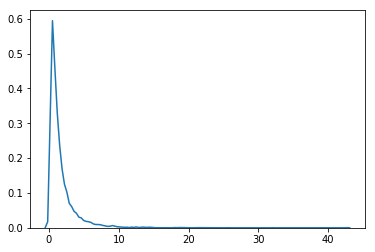

In [47]:
x= np.random.lognormal(size=10000)  # take a random lognormally distributed distribution
print(len(x),x[:5])

sn.kdeplot(x); # or sn.distplot(x)

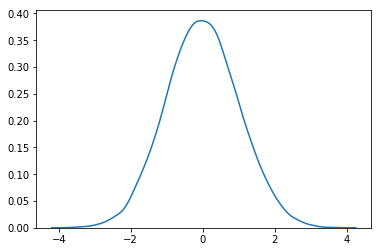

In [48]:
sn.kdeplot(np.log(x));

# Python 3 lists etc

* In Python 3 many things which were lists in Python 2 aren't anymore. 
* The "trick" to apply Python 2 techniques is simply to apply the  `list()` function.
* As an example

In [ ]:
mydict= {1:'a', 2:'b'}
my_values=mydict.values()
print(my_values)

# try my_values[0]

In [ ]:
list(my_values)[0]

In [ ]:
print(mydict.keys())
#np.array(mydict.keys())*2  # gives an error


np.array(list(mydict.keys())) *2